In [10]:
import yfinance as yf
from textblob import TextBlob
import tweepy 
from tweepy import OAuthHandler
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [11]:
consumer_key = 'eAl6lT46SFrVTZXF01ua1dX00'
consumer_secret = 'iXO9j0mVILdRoc50uX17uQ80JO6TdzBwRllJeEoi2MCjYBC5oL'
access_token = '706417376275738624-GORsArmENkVkaCSxJFqGDC8MlZrcv36'
access_token_secret = '8sOPjZ3VRtwOaDO1m3vRHOABKa0ha6crHSN9ivt6UWiIy'
try: 
    # create OAuthHandler object 
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    # set access token and secret 
    auth.set_access_token(access_token, access_token_secret)
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth)
except: 
    print("Error: Authentication Failed")

In [14]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#AMZN"or"#Stock",count=100, lang ="en",since_id="2021-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [15]:
data

,Date,Tweets
0,2022-04-14,$MELI\nLosing trend line and rdy to close belo...
1,2022-04-14,Amazon CEO Andy Jassy’s 2021 Letter to Shareho...
2,2022-04-14,Amazon CEO: No plans to accept crypto anytime ...
3,2022-04-14,S&amp;P 500 Technical Analysis 📈\n\nInverted H...
4,2022-04-14,Amazon (NASDAQ: AMZN) said Wednesday it’s addi...
...,...,...
280,2022-04-06,RT @MovingF94467288: She didn’t even have a na...
281,2022-04-06,$AMZN - #AMZN chart on @TradingView https://t....
282,2022-04-06,https://t.co/RDp9UH3WVN INC: We entered a 2022...
283,2022-04-06,S&amp;P 500 ETF TRUST ETF: We entered a 2022-0...


In [21]:
polarity = 0
positive = 0
negative = 0
neutral = 0
null = 0
for tweet in list_of_tweets:
    analysis = TextBlob(tweet.text)
    #print(analysis)
    polarity = analysis.sentiment.polarity
    #print(polarity)
    if analysis.subjectivity == 0:  
        null += 1
        next
    if polarity < 0:
        negative += 1
    elif polarity == 0:
        neutral += 1
    else:
        positive += 1
    if positive > ((num_tweets - null)/2):
        print True

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(True)? (Temp/ipykernel_26220/3367193845.py, line 21)

In [16]:
query = input("Please enter a stock quote from the CSV to perform the search: ").upper()

def stock_sentiment(quote, num_tweets):
    date_since = (datetime.datetime.now() - datetime.timedelta(days=30)).date()
    list_of_tweets = api.search_tweets(quote, count=num_tweets, lang ="en", since_id= date_since, tweet_mode = "extended")
    polarity = 0
    positive = 0
    negative = 0
    neutral = 0
    null = 0
    for tweet in list_of_tweets:
        analysis = TextBlob(tweet.text)
        #print(analysis)
        polarity = analysis.sentiment.polarity
        #print(polarity)
        if analysis.subjectivity == 0:  
            null += 1
            next
        if polarity < 0:
            negative += 1
        elif polarity == 0:
            neutral += 1
        else:
            positive += 1
        if positive > ((num_tweets - null)/2):
            return True

KeyboardInterrupt: Interrupted by user

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
df=pd.read_csv(r"C:\Users\aishw\Downloads\AMZN (7).csv")
print("data is loaded")

data is loaded


In [7]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-04-2021,3400.850098,3432.000000,3395.629883,3400.000000,3400.000000,3315800
1,14-04-2021,3404.040039,3404.129883,3326.000000,3333.000000,3333.000000,3145200
2,15-04-2021,3371.000000,3397.000000,3352.000000,3379.090088,3379.090088,3233600
3,16-04-2021,3380.000000,3406.800049,3355.590088,3399.439941,3399.439941,3186000
4,19-04-2021,3390.330078,3435.929932,3360.159912,3372.010010,3372.010010,2725400


In [8]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
249,06-04-2022,3233.010010,3244.000000,3145.090088,3175.120117,3175.120117,3952800
250,07-04-2022,3168.000000,3201.580078,3090.229980,3155.689941,3155.689941,3406800
251,08-04-2022,3135.000000,3147.370117,3084.620117,3089.209961,3089.209961,2295100
252,11-04-2022,3054.260010,3082.729980,3010.689941,3022.439941,3022.439941,2605600
253,12-04-2022,3073.850098,3101.979980,3007.659912,3015.750000,3015.750000,2758900


In [94]:
df1= df.reset_index()["Close"]
print(df1)

0      3400.000000
1      3333.000000
2      3379.090088
3      3399.439941
4      3372.010010
          ...     
249    3175.120117
250    3155.689941
251    3089.209961
252    3022.439941
253    3015.750000
Name: Close, Length: 254, dtype: float64


Text(0, 0.5, 'Closing Price')

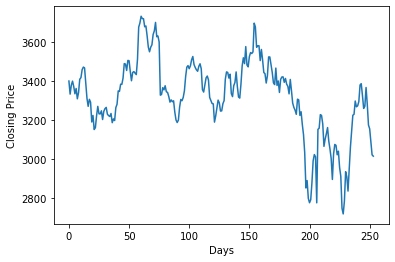

In [95]:
plt.plot(df1)
plt.xlabel("Days")
plt.ylabel("Closing Price")

In [88]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [89]:
time_step = 100
trainX, trainY = create_dataset(df1, time_step)
trainX =trainX.reshape(trainX.shape[0],trainX.shape[1] , 1)


In [90]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))	
model.add(Dense(1))   
model.compile(loss='mean_squared_error', optimizer='adam')

In [91]:
model.fit(trainX, trainY, epochs=50, batch_size=25, verbose=2)

Epoch 1/50
7/7 - 9s - loss: 0.2079 - 9s/epoch - 1s/step
Epoch 2/50
7/7 - 1s - loss: 0.0630 - 985ms/epoch - 141ms/step
Epoch 3/50
7/7 - 1s - loss: 0.0419 - 1s/epoch - 150ms/step
Epoch 4/50
7/7 - 1s - loss: 0.0331 - 1s/epoch - 147ms/step
Epoch 5/50
7/7 - 1s - loss: 0.0357 - 946ms/epoch - 135ms/step
Epoch 6/50
7/7 - 1s - loss: 0.0321 - 850ms/epoch - 121ms/step
Epoch 7/50
7/7 - 1s - loss: 0.0295 - 877ms/epoch - 125ms/step
Epoch 8/50
7/7 - 1s - loss: 0.0310 - 881ms/epoch - 126ms/step
Epoch 9/50
7/7 - 1s - loss: 0.0315 - 897ms/epoch - 128ms/step
Epoch 10/50
7/7 - 1s - loss: 0.0323 - 816ms/epoch - 117ms/step
Epoch 11/50
7/7 - 1s - loss: 0.0308 - 844ms/epoch - 121ms/step
Epoch 12/50
7/7 - 1s - loss: 0.0268 - 842ms/epoch - 120ms/step
Epoch 13/50
7/7 - 1s - loss: 0.0305 - 913ms/epoch - 130ms/step
Epoch 14/50
7/7 - 1s - loss: 0.0258 - 928ms/epoch - 133ms/step
Epoch 15/50
7/7 - 1s - loss: 0.0255 - 903ms/epoch - 129ms/step
Epoch 16/50
7/7 - 1s - loss: 0.0266 - 1s/epoch - 144ms/step
Epoch 17/50
7/7 

In [96]:
train_predict=model.predict(trainX)
train_predict=scaler.inverse_transform(train_predict)
array_length = len(train_predict)
val = train_predict[array_length - 1]

In [1]:
result = print("The price will move from", (df['Close'].iloc[-1]),"to" , str(val)[1:-1])

NameError: name 'df' is not defined

In [ ]:
look_back=50
trainpredictionplot = numpy.empty_like(af1)
trainpredictionplot[:,:]= np.nan
trainpredictionplot[look_back:len(training_predict)+look_back,:]= training_predict

testpredictionplot = numpy.empty_like(af1)
testpredictionplot[:,:]= np.nan
testpredictionplot[len(training_predict)+(look_back*2)+1:len(af1)-1,:]= testing_predict

plt.plot(scaler.inverse_transform(af1))
plt.plot(trainpredictionplot)
plt.plot(testpredictionplot)
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title("STOCK PREDICTION USING LSTM AND SENTIMENT ANALYSIS")
plt.legend(["Original data","Actual Value","Predicted value"])
plt.show()

In [71]:
if not stock_sentiment(query, num_tweets=100):
    print('This stock has bad sentiment, please re-run the script')
    sys.exit()

Unexpected parameter: since


AttributeError: 'Status' object has no attribute 'text'

In [68]:
if not get_historical(query):
    print('Google returned a 404, please re-run the script and')
    print('enter a valid stock quote from NASDAQ')
    sys.exit() 

In [69]:
print(stock_prediction())

None
